In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy 
from sympy import symbols, Eq,linsolve

<br><br>

# Chapter 4 : Orthogonality
Content :
* Orthogonality
* Check if 2 vector are orthogonal
* Nullspace & Row Space association
* Projection onto a Line
* Projection Onto a Subspace
* Linear Least squares


<br><br>

## Orthogonality

#### Two vectors are orthogonal when their dot product is zero 
* v.w = v_transpose . w = 0
* ||v|| ** 2 + ||w|| ** 2 = ||v+w|| ** 2 --> ( later in this notebook ) 

<br>

## Check if 2 vector are orthogonal

#### if vector v and w are orthogonal , then their dot product equals to zero --> v * w_T = 0

<br>

#### Example : Orthogonal vectors

In [14]:
W = np.array([1,3,-2])
Y = np.array([2,2,4])

np.dot(W,Y)


0

#### Example : Display 2 orthogonal vector 

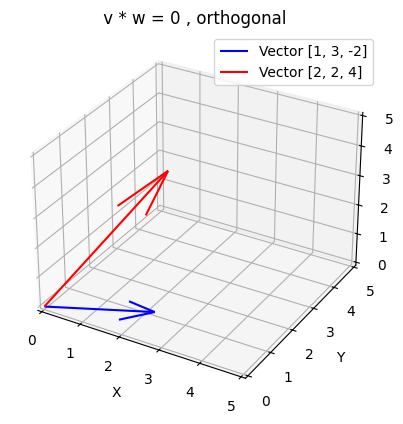

In [16]:
# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the origin
origin = np.array([0, 0, 0])

# Plot vector 1
ax.quiver(*origin, *W, color='b', label='Vector [1, 3, -2]')

# Plot vector 2
ax.quiver(*origin, *Y, color='r', label='Vector [2, 2, 4]')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Add a legend
ax.legend()

plt.title(" v * w = 0 , orthogonal ")

# Show the plot
plt.show()


<br><br>

### Example : Show -->  ||V||**2 + ||W||**2 = ||V+W||**2

##### Orthogonal Vectors : if 2 vectors are orthogonal  then 
* V_T * W = 0
* ||V||**2 + ||W||**2 = ||V+W||**2

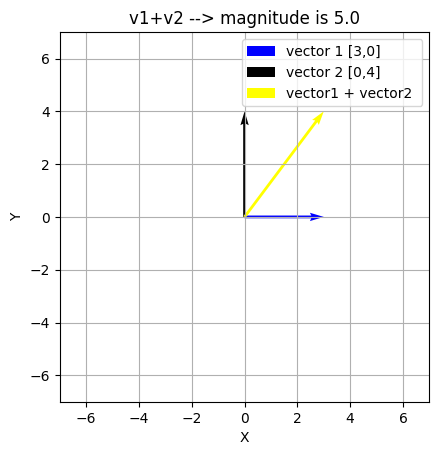

In [35]:
# Define the vectors
vector_1 = np.array([3, 0])
vector_2 = np.array([0, 4])
v1_plus_v2 = vector_1 + vector_2

# Create a new figure for the 2D plot
fig, ax = plt.subplots()

# Plot the vector
ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, label='vector 1 [3,0]',color="b")
ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, label='vector 2 [0,4]',color="black")
ax.quiver(0, 0, v1_plus_v2[0], v1_plus_v2[1], angles='xy', scale_units='xy', scale=1, label='vector1 + vector2 ',color="yellow")


ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set the limits of the plot to show all four quadrants
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])

# Add a legend
ax.legend()

# Set equal aspect ratio
ax.set_aspect('equal')

# Draw grid
ax.grid(True)

plt.title(f"v1+v2 --> magnitude is {np.linalg.norm(vector_1+vector_2)}")

# Show the plot
plt.show()


In [32]:
print("||V||**2 + ||W||**2 = ",np.linalg.norm(vector_1)**2  + np.linalg.norm(vector_2) **2)
print("||V+W||**2 = ",np.linalg.norm(vector_1+vector_2)**2)

||V||**2 + ||W||**2 =  25.0
||V+W||**2 =  25.0


#### We know || V + W || ** 2  = V**2 + 2WV + W**2 , because W and V orthogonal, W*V = 0 , therefore 
* || V + W || ** 2  = V**2  +  W**2

<br><br>

## Nullspace & Row Space association

####  The nullspace of A is orthogonal to the row space of A. This means that every vector in the nullspace is orthogonal to every vector in the row space.

<br>

#### Example : Show Nullspace is orthogonal to Row Space

In [36]:
x = np.array([1,-2,1])
y = np.array([1,0,-1])

A = np.row_stack((x, y ))

A  = sympy.Matrix(A)
A

Matrix([
[1, -2,  1],
[1,  0, -1]])

#### find nullspace

In [37]:
nullspace = A.nullspace()
sympy.Matrix(nullspace)

Matrix([
[1],
[1],
[1]])

#### find rowspace

In [38]:
row_space = A.rowspace()   
sympy.Matrix(row_space)

Matrix([
[1, -2,  1],
[0,  2, -2]])

#### row_space * null_space = 0 

In [40]:
np.matmul(row_space,nullspace)

array([[[0]],

       [[0]]], dtype=object)

<br><br><br>

## Projection onto a Line

#### Projection onto line --> for projecting vector B onto A -->  (A_t * B / A_t * A) * A

<BR>

### Example : Project vector B (1,1,1) onto vector A (1,2,2) and show it in 3 dimensional space

In [46]:
B = np.array([1,1,1])
A = np.array([1,2,2])

In [48]:
projection = (A.dot(B) / A.dot(A)) * A
projection

array([0.55555556, 1.11111111, 1.11111111])

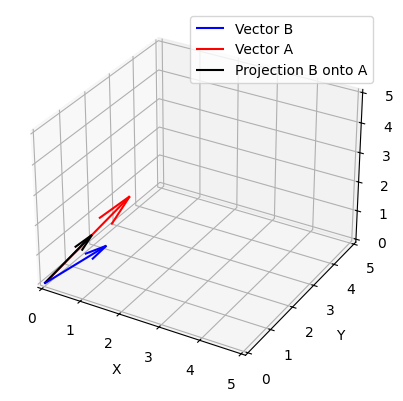

In [50]:
# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the origin
origin = np.array([0, 0, 0])

# vector 1 and vector 2
ax.quiver(*origin, *B, color='b', label='Vector B')
ax.quiver(*origin, *A, color='r', label='Vector A')
ax.quiver(*origin, *projection, color='black', label='Projection B onto A')


# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Add a legend
ax.legend()

# Show the plot
plt.show()


<br><br>

## Projection Onto a Subspace

<br>

#### A_t * A * x = A_t * b
#### projection = A*x
* Matrix A: This matrix contains the basis vectors of the subspace (columns of A span the subspace).
* Vector b: This is the vector you want to project onto the subspace spanned by the columns of 𝐴
* Vector x: This is the vector of unknowns (parameters) in the least squares problem.

<br><br>

#### Example : Project Vector (4,2,3)   to  (1,0,2 ) , (0,1,1) --> Basis vectors of the subspace

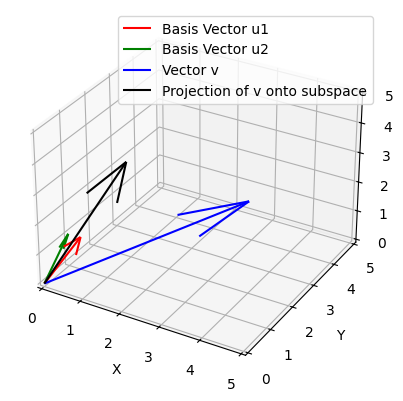

In [55]:
# Define vectors to be projected
v = np.array([4, 2, 3])

# Basis vectors for the subspace
u1 = np.array([1, 0, 2])
u2 = np.array([0, 1, 1])

# Form the basis matrix U
U = np.column_stack((u1, u2))

# Compute U^T U and U^T v
UTU = np.dot(U.T, U)
UTv = np.dot(U.T, v)

# Solve for coefficients c1 and c2
coeffs = np.linalg.solve(UTU, UTv)

# Compute the projection
projection = np.dot(U, coeffs)

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the origin
origin = np.array([0, 0, 0])

# Plot vectors
ax.quiver(*origin, *u1, color='r', label='Basis Vector u1')
ax.quiver(*origin, *u2, color='g', label='Basis Vector u2')
ax.quiver(*origin, *v, color='b', label='Vector v')
ax.quiver(*origin, *projection, color='k', label='Projection of v onto subspace')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

# Add a legend
ax.legend()

# Show the plot
plt.show()


<br><br>

## Linear Least squares

##### Consider the linear equation: Ax=b
##### When m>n, it is generally the case that  has no solution
##### There is no solution for Ax = b
##### but least square approximation gives  the value of x that minimizes some error.
##### this error is --> ||Ax-b||**2


<br>

### Example 

<br>

In [26]:
x = np.array([1,0,1])
y = np.array([0,1,1])

A = np.column_stack((x, y ))

A  = sympy.Matrix(A)
A

Matrix([
[1, 0],
[0, 1],
[1, 1]])

In [27]:
B = np.array([1,1,0])
B = sympy.Matrix(B) # default column vector
B

Matrix([
[1],
[1],
[0]])

<br>

#### No solution to Ax=b

In [28]:
sympy.linsolve((A, B))

EmptySet

<br>

#### The solution to the least squares problem --> A_t * A * x = A_t * B

In [29]:
left = np.matmul(A.transpose(),A)
sympy.Matrix(left)

Matrix([
[2, 1],
[1, 2]])

In [30]:
right = np.matmul(A.transpose(),B)
sympy.Matrix(right)

Matrix([
[1],
[1]])

In [37]:
x, y = symbols('x y')

# Define the system of equations
eq1 = Eq(2*x + 1*y, 1) 
eq2 = Eq(1*x + 2*y, 1)

# Solve the system
solution = linsolve([eq1, eq2], x, y)

print(solution)

{(1/3, 1/3)}


<br><br><br><br>